# Project Block 2: Advanced Statistics
Instructions can be found at: https://rpubs.com/cdorante/tc3006c_p2

Ricardo Andrés Cáceres Villibord

A01706972

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/Colab Notebooks/DataScience/Módulo Estadística"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/DataScience/Módulo Estadística
dataus2023.csv	firmsus2023.csv  workshop1.ipynb


In [ ]:
data = pd.read_csv('dataus2023.csv')
data.shape

(533088, 21)

In [ ]:
firms = pd.read_csv('firmsus2023.csv')
firms.shape
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.33,104.00,"452,000.00",NaN,2000
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,"5,057,000.00","1,622,000.00","2,679,000.00","2,186,000.00",0.00,44.91,73.75,"452,271.97","1,453,000.00",2000
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,"5,344,000.00","1,762,000.00","2,925,000.00","2,510,000.00",0.00,29.80,48.94,"453,014.58","1,581,000.00",2000
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,"5,655,000.00","1,853,000.00","3,160,000.00","2,758,000.00",0.00,33.34,54.75,"456,366.38","1,741,000.00",2000
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,"5,461,000.00","2,129,000.00","3,667,000.00","3,070,000.00",0.00,18.71,30.73,"456,769.74","1,821,000.00",2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.78,2.78,"104,098.54",NaN,2022
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.43,2.43,"104,098.54",NaN,2022
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023


### 2. Hacemos un merge para adicionar la industria y el status a data:

In [ ]:
# Convertir las fechas de la columna 'q' en el formato de trimestres y almacenar en la nueva columna de 'qdate'
data['qdate'] = pd.PeriodIndex(data.q, freq="Q")
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.33,104.00,"452,000.00",NaN,2000,2000Q1
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,"1,622,000.00","2,679,000.00","2,186,000.00",0.00,44.91,73.75,"452,271.97","1,453,000.00",2000,2000Q2
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,"1,762,000.00","2,925,000.00","2,510,000.00",0.00,29.80,48.94,"453,014.58","1,581,000.00",2000,2000Q3
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,"1,853,000.00","3,160,000.00","2,758,000.00",0.00,33.34,54.75,"456,366.38","1,741,000.00",2000,2000Q4
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,"2,129,000.00","3,667,000.00","3,070,000.00",0.00,18.71,30.73,"456,769.74","1,821,000.00",2001,2001Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.78,2.78,"104,098.54",NaN,2022,2022Q3
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.43,2.43,"104,098.54",NaN,2022,2022Q4
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023,2023Q1
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"104,098.54",NaN,2023,2023Q2


In [ ]:
firms.columns
# Sacar lo necesario
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
# Ponerles un nombre a las columnas
firms1.columns=['firm', 'Empresa', 'status', 'industria']

# HACER EL MERGE de data y firms1
# El 'on=firm' especifica que la columna 'firm' se utilizara com clave para la fusion. Las filas que tienen el mismo valor en la columna 'firm' se fusionaran
# El 'how=left' especifica que es un left join
data = pd.merge(data, firms1, on="firm", how="left")

data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.33,104.00,"452,000.00",NaN,2000,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,0.00,44.91,73.75,"452,271.97","1,453,000.00",2000,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,0.00,29.80,48.94,"453,014.58","1,581,000.00",2000,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,0.00,33.34,54.75,"456,366.38","1,741,000.00",2000,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,0.00,18.71,30.73,"456,769.74","1,821,000.00",2001,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [ ]:
# Esto significa que el DataFrame 'data' tendrá un índice jerárquico con dos niveles, donde "firm" es el primer nivel y "qdate" es el segundo nivel.
data.set_index(["firm", "qdate"], inplace=True)
data

q  fiscalmonth       revenue         cogs         sgae  \
firm   qdate                                                                 
A      2000Q1  2000q1          NaN           NaN          NaN          NaN   
       2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
       2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
       2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
       2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   
...               ...          ...           ...          ...          ...   
ZY_old 2022Q3  2022q3          NaN           NaN          NaN          NaN   
       2022Q4  2022q4          NaN           NaN          NaN          NaN   
       2023Q1  2023q1          NaN           NaN          NaN          NaN   
       2023Q2  2023q2          NaN           NaN          NaN          NaN   
       2023Q3  2023q3          NaN           NaN          NaN          NaN   

               otherincome  extraordinaryitems  finexp  incometax  \
firm   qdate                                                        
A      2000Q1          NaN                 NaN     NaN        NaN   
       2000Q2    73,000.00                0.00    0.00 161,000.00   
       2000Q3   101,000.00                0.00    0.00 244,000.00   
       2000Q4   111,000.00                0.00    0.00 407,000.00   
       2001Q1    19,000.00          -25,000.00    0.00 119,000.00   
...                    ...                 ...     ...        ...   
ZY_old 2022Q3          NaN                 NaN     NaN        NaN   
       2022Q4          NaN                 NaN     NaN        NaN   
       2023Q1          NaN                 NaN     NaN        NaN   
       2023Q2          NaN                 NaN     NaN        NaN   
       2023Q3          NaN                 NaN     NaN        NaN   

               totalassets  ...  currentliabilities  longdebt  adjprice  \
firm   qdate                ...                                           
A      2000Q1          NaN  ...                 NaN       NaN     63.33   
       2000Q2 7,321,000.00  ...        2,186,000.00      0.00     44.91   
       2000Q3 7,827,000.00  ...        2,510,000.00      0.00     29.80   
       2000Q4 8,425,000.00  ...        2,758,000.00      0.00     33.34   
       2001Q1 9,208,000.00  ...        3,070,000.00      0.00     18.71   
...                    ...  ...                 ...       ...       ...   
ZY_old 2022Q3          NaN  ...                 NaN       NaN      2.78   
       2022Q4          NaN  ...                 NaN       NaN      2.43   
       2023Q1          NaN  ...                 NaN       NaN       NaN   
       2023Q2          NaN  ...                 NaN       NaN       NaN   
       2023Q3          NaN  ...                 NaN       NaN       NaN   

               originalprice  sharesoutstanding  fixedassets  year  \
firm   qdate                                                         
A      2000Q1         104.00         452,000.00          NaN  2000   
       2000Q2          73.75         452,271.97 1,453,000.00  2000   
       2000Q3          48.94         453,014.58 1,581,000.00  2000   
       2000Q4          54.75         456,366.38 1,741,000.00  2000   
       2001Q1          30.73         456,769.74 1,821,000.00  2001   
...                      ...                ...          ...   ...   
ZY_old 2022Q3           2.78         104,098.54          NaN  2022   
       2022Q4           2.43         104,098.54          NaN  2022   
       2023Q1            NaN         104,098.54          NaN  2023   
       2023Q2            NaN         104,098.54          NaN  2023   
       2023Q3            NaN         104,098.54          NaN  2023   

                                 Empresa     status  \
firm   qdate                                          
A      2000Q1  Agilent Technologies, Inc     activo   
       2000Q2  Agilent Technologies, Inc     activo   


### 3. Calculation of Financial Variables and Ratios

In [ ]:
# Quarterly Returns
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))
# Log Annual Returns
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

# Calculo retornos 1 año en el futuro
data['f1rq'] =  data['rq'].shift(-1)
data['f4rq'] = data['rq'].shift(-4)

# Calculate operating profit (also called earnings before interest and taxes) : ebit = revenue - cogs - sgae
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']

# Calculate operating profit margin: opm = ebit / revenue
data['opm'] = np.where(data['revenue']==0, np.NaN,data['ebit'] / data['revenue'])

# Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']

# Calculate profit margin (ratio) as: pm = ni / revenue
data['pm'] = np.where(data['revenue']==0, np.NaN, data['netincome'] / data['revenue'])

# Calculate asset turn over ratio: ato = revenue / totalassets   = que tanto la empresa vendio con respecto a su total de activos
data['ato'] = np.where(data['totalassets']==0, np.NaN, data['revenue'] / data['totalassets'])

# Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio'] = np.where(data['currentliabilities']==0, np.NaN, data['currentassets'] / data['currentliabilities'])

# Calculate financial leverage ratio as: finlev=longdebt / totalassets    =  apalancamiento; que tanto la empresa debe $ con respecto a lo que tienen en activo
data['finlev'] = np.where(data['totalassets']==0, np.NaN, data['longdebt'] / data['totalassets'])

# Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']

# Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']


# # Para poder leer mejor los numeros, los formateamos con comas y a dos puntos decimales
pd.options.display.float_format = '{:,.2f}'.format

data.head()

q  fiscalmonth       revenue         cogs         sgae  \
firm qdate                                                                 
A    2000Q1  2000q1          NaN           NaN          NaN          NaN   
     2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
     2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
     2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
     2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2    73,000.00                0.00    0.00 161,000.00 7,321,000.00   
     2000Q3   101,000.00                0.00    0.00 244,000.00 7,827,000.00   
     2000Q4   111,000.00                0.00    0.00 407,000.00 8,425,000.00   
     2001Q1    19,000.00          -25,000.00    0.00 119,000.00 9,208,000.00   

             ...  f4rq         ebit  opm  netincome   pm  ato  acidratio  \
firm qdate   ...                                                           
A    2000Q1  ... -0.58          NaN  NaN        NaN  NaN  NaN        NaN   
     2000Q2  ...  0.06   385,000.00 0.08 297,000.00 0.06 0.65       2.31   
     2000Q3  ... -0.51   595,000.00 0.08 452,000.00 0.06 0.95       2.13   
     2000Q4  ...  0.38 1,053,000.00 0.10 757,000.00 0.07 1.28       2.05   
     2001Q1  ...  0.20   279,000.00 0.10 154,000.00 0.05 0.31       1.78   

             finlev        mvalue    bookvalue  
firm qdate                                      
A    2000Q1     NaN 47,008,000.00          NaN  
     2000Q2    0.00 33,355,057.57 4,642,000.00  
     2000Q3    0.00 22,169,400.96 4,902,000.00  
     2000Q4    0.00 24,986,059.36 5,265,000.00  
     2001Q1    0.00 14,036,533.81 5,541,000.00  

[5 rows x 36 columns]

### 4. Firm Composition of the US Financial Market

Considering the **most recent** financial quarter of the dataset

In [ ]:
# Sacar el quarter mas reciente
aux = data['q'] == '2023q2'
a_2023q2 =  data[aux]

- Show how many active firms by industry there are in the sample

In [ ]:
# Sacar las status activo
aux2 = a_2023q2['status'] == 'activo'
active_2023q2 = a_2023q2[aux2]
active_firms_industry = active_2023q2['industria'].value_counts()
active_firms_industry

Industrias manufactureras                                                                        1540
Servicios financieros y de seguros                                                                686
Información en medios masivos                                                                     256
Comercio al por menor                                                                             145
Servicios profesionales, científicos y técnicos                                                   137
Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación     128
Minería, explotación de canteras y extracción de petróleo y gas                                   113
Comercio al por mayor                                                                              79
Empresas de electricidad, gas y agua                                                               77
Servicios de alojamiento temporal y de preparación de alimentos y bebidas         

- For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

In [ ]:
active_2023q2.head()

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2023Q2,2023q2,6.00,"3,473,000.00","1,581,000.00","1,083,000.00","6,000.00",0.00,"28,000.00","133,000.00","10,792,000.00",...,NaN,"809,000.00",0.23,"654,000.00",0.19,0.32,2.37,0.25,"35,518,942.11","5,781,000.00"
AA,2023Q2,2023q2,6.00,"5,354,000.00","4,919,000.00","601,000.00","-60,000.00","20,000.00","53,000.00","74,000.00","14,128,000.00",...,-0.31,"-166,000.00",-0.03,"-333,000.00",-0.06,0.38,1.80,0.13,"6,053,162.45","6,458,000.00"
AAIC,2023Q2,2023q2,6.00,"26,716.00","16,512.00",NaN,0.00,NaN,0.00,"1,496.00","817,470.00",...,NaN,NaN,NaN,NaN,NaN,0.03,NaN,0.11,"162,125.89","220,012.00"
AAL,2023Q2,2023q2,6.00,"26,244,000.00",0.00,"23,644,000.00","-21,000.00",0.00,"800,000.00","431,000.00","67,260,000.00",...,NaN,"2,600,000.00",0.10,"1,348,000.00",0.05,0.39,0.75,0.46,"11,712,353.39","-4,385,000.00"
AAME,2023Q2,2023q2,6.00,"95,457.00",0.00,NaN,0.00,NaN,0.00,101.00,"372,955.00",...,NaN,NaN,NaN,NaN,NaN,0.26,NaN,NaN,"39,381.07","103,486.00"


In [ ]:
# Primero reseteamos el index para que ya no haya multindex como vimos en el head anterior. Asi no va a haber problema para sacar el count de 'firm'
active_2023q2_reset = active_2023q2.reset_index()

# Agrupa por industria y luego con el '.agg' aplicamos funciones de agrgacion a cada grupo. Las funcionaes de agregacion se aplican a columnas especificas en cada grupo.
industrySummary = active_2023q2_reset.groupby('industria').agg(
    {
        'firm': 'count',
        'mvalue': ['min','max','mean','median','std'],
        'bookvalue': ['min','max','mean','median','std']
    }
)

industrySummary

firm       mvalue  \
                                                   count          min   
industria                                                               
-                                                      2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    17     3,687.58   
Comercio al por mayor                                 79     5,458.41   
Comercio al por menor                                145     3,795.68   
Construcción                                          46     2,212.28   
Empresas de electricidad, gas y agua                  77    33,728.24   
Industrias manufactureras                           1540       796.17   
Información en medios masivos                        256     3,256.72   
Minería, explotación de canteras y extracción d...   113        34.17   
Otros servicios excepto actividades gubernament...    17    16,742.10   
Servicios de alojamiento temporal y de preparac...    71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...   128     2,802.16   
Servicios de esparcimiento culturales y deporti...    24     3,092.33   
Servicios de salud y de asistencia social             63       717.42   
Servicios educativos                                  13    83,986.36   
Servicios financieros y de seguros                   686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...    68     3,440.61   
Servicios profesionales, científicos y técnicos      137     3,638.32   
Transportes, correos y almacenamiento                 70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                               \
                                                            mean       median   
industria                                                                       
-                                                   5,231,091.58 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...  7,682,534.32   857,921.50   
Comercio al por mayor                               6,028,485.16 1,450,954.00   
Comercio al por menor                              24,720,931.28 1,662,158.77   
Construcción                                        5,996,741.18 2,559,768.80   
Empresas de electricidad, gas y agua               15,446,636.74 5,192,340.89   
Industrias manufactureras                          12,901,394.10   684,326.81   
Información en medios masivos                      23,394,300.99 2,370,1

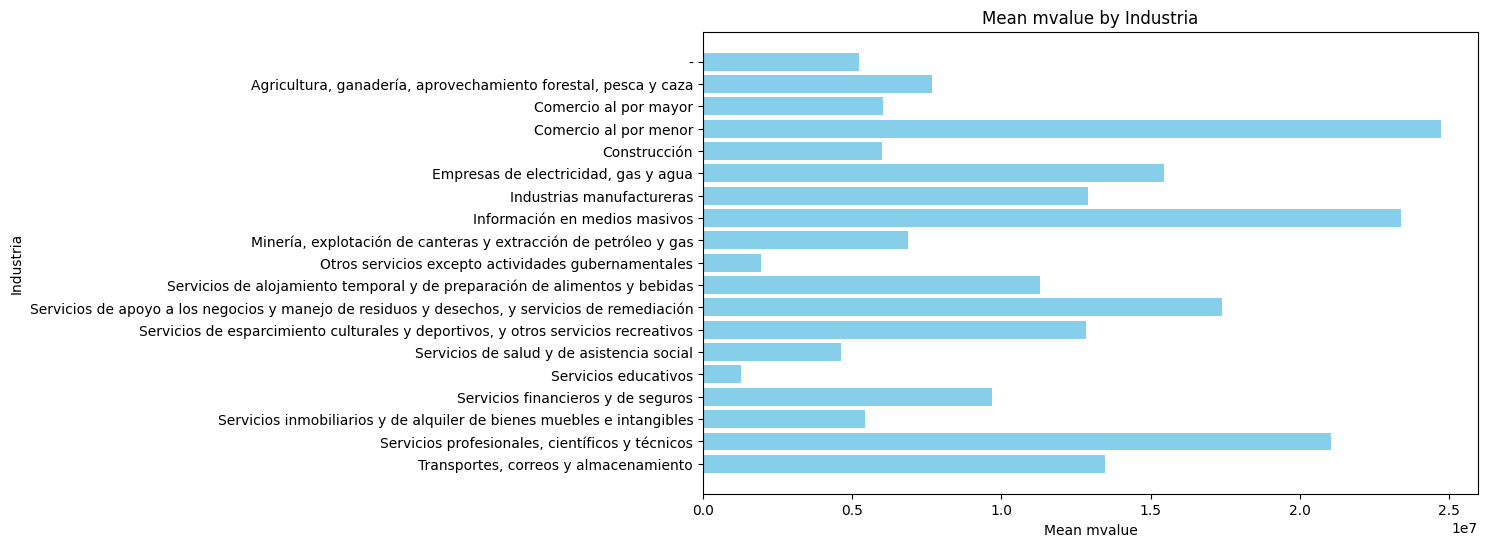

In [ ]:
# Extraer el mean the 'market value' para cada industria
mean_mvalue = industrySummary['mvalue']['mean']

# Extraer la industria como si fuera un index
industrias = industrySummary.index

# Graficar para darnos una mejor idea de como esta distribuido
plt.figure(figsize=(10, 6))
plt.barh(industrias, mean_mvalue, color='skyblue')
plt.xlabel('Mean mvalue')
plt.ylabel('Industria')
plt.title('Mean mvalue by Industria')
plt.gca().invert_yaxis()
plt.show()

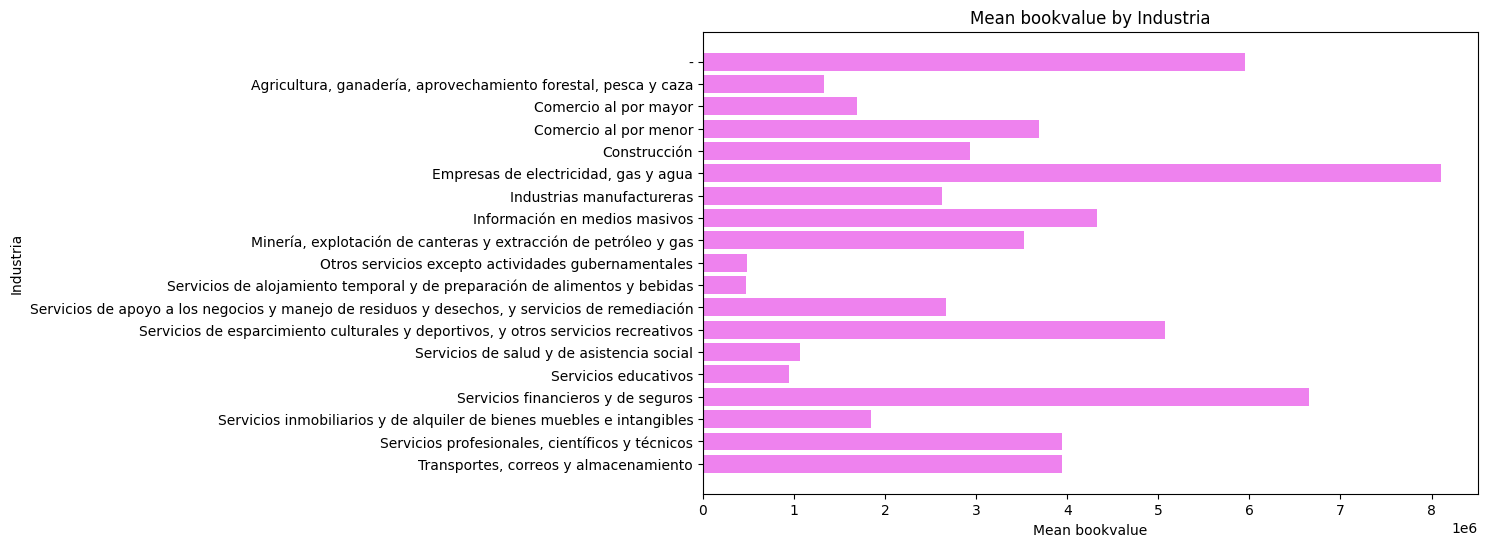

In [ ]:
# Extraer el mean the 'market value' para cada industria
mean_bookvalue = industrySummary['bookvalue']['mean']

# Extraer la industria como si fuera un index
industrias = industrySummary.index

# Graficar para darnos una mejor idea de como esta distribuido
plt.figure(figsize=(10, 6))
plt.barh(industrias, mean_bookvalue, color='violet')
plt.xlabel('Mean bookvalue')
plt.ylabel('Industria')
plt.title('Mean bookvalue by Industria')
plt.gca().invert_yaxis()
plt.show()

*PODEMOS OBSERVAR COMO EN LOS PROMEDIOS DE MARKET VALUE, HAY DOS INDUSTRIAS QUE SOBRESALEN, LA DE COMERCIO AL POR MENOR Y LA DE INFORMACIÓN EN MEDIOS MASIVOS. SIN EMBARGO ESTO CAMBIA CUANDO NOS VAMOS AL BOOK VALUE, EN EL BOOK VALUE LAS INDUSTRIAS QUE SOBRESALEN SON LAS EMPRESAS DE ELECTRICIDAD, GAS Y AGUA Y LAS DE SERVICIOS FINANCIEROS Y DE SEGUROS*

In [ ]:
# Hacer otra tabla para que pueda leer mejor
industrySummary = active_2023q2_reset.pivot_table(
    index='industria',
    values=['mvalue', 'bookvalue'],
    aggfunc=['min', 'max', 'mean']
)

In [ ]:
# Descriptive statistics for market value and book value for each industry
industrySummary.describe()

min                         max                   \
           bookvalue       mvalue      bookvalue           mvalue   
count          19.00        19.00          19.00            19.00   
mean   -3,231,163.30   286,508.54  91,834,246.00   570,083,010.93   
std     5,091,190.33 1,197,550.00 136,391,027.43   900,069,089.23   
min   -15,493,000.00        34.17   1,976,851.00     3,171,234.18   
25%    -4,275,783.00     2,947.24   7,995,000.00    51,347,612.61   
50%    -1,403,000.00     3,687.58  29,111,000.00   153,955,377.34   
75%      -374,381.00    13,274.37 135,329,000.00   597,805,377.61   
max     5,948,964.00 5,231,091.58 539,883,000.00 3,050,896,326.94   

              mean                
         bookvalue        mvalue  
count        19.00         19.00  
mean  3,224,244.15 10,908,930.03  
std   2,141,734.77  6,979,393.28  
min     469,942.55  1,285,681.43  
25%   1,507,944.53  5,715,319.22  
50%   2,934,480.25  9,689,768.58  
75%   4,136,329.32 14,450,301.30  
max   8,103,910.74 24,720,931.28

In [ ]:
# Calculate standard deviation for market value and book value for each industry
industrySummary.std()

min   bookvalue     5,091,190.33
      mvalue        1,197,550.00
max   bookvalue   136,391,027.43
      mvalue      900,069,089.23
mean  bookvalue     2,141,734.77
      mvalue        6,979,393.28
dtype: float64

*DE TODO ESTE ANALISIS DESCRIPTIVO, PODEMOS OBSERVAR COMO BOOKVALUE TIENE UNA DESCIACION ESTANDAR RELATIVAMENTE ALTA , LO QUE SUGIERE UNA VARIABLIDAD SUSTANCIAL EN LOS VALORES CONTABLES DE LAS EMPRESAS. MIENTRAS QUE MVALUE TIENE UN RANGO MAS PEQUEÑO DE VALORES Y UNA MEDIA POSITIVA A DIFERENCIA DE BOOKVALUE QUE TIENE UNA MEDIA NEGATIVA. TAMBIEN TIENE UNA DESVIACION ESTANDAR MENOR A BOOKVALUE, LO QUE INDICA MENOS VARIABILIDAD EN LOS VALORES DE MERCADO DE LAS EMPRESAS.*

- Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [ ]:
# Sortear el the dataset por 'mvalue' en orden de mayor a menor
sorted_data = active_2023q2_reset.sort_values(by='mvalue', ascending=False)

# Seleccionar las 10 con mas valor
top_10_firms_mvalue = sorted_data.head(10)

# El typical size es el mean de todas las industrias
typical_size_mvalue = active_2023q2_reset['mvalue'].mean()

# Calcular la desviacion de la typical size
top_10_firms_mvalue['deviation_from_typical'] = top_10_firms_mvalue['mvalue'] - typical_size_mvalue

# Print las top 10 con su desviacion de la typical size
top_10_firms_mvalue[['firm', 'mvalue', 'deviation_from_typical']]

<ipython-input-85-93cc6b7838b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_firms_mvalue['deviation_from_typical'] = top_10_firms_mvalue['mvalue'] - typical_size_mvalue


,firm,mvalue,deviation_from_typical
8,AAPL,"3,050,896,326.94","3,037,693,265.83"
2111,MSFT,"2,532,080,938.79","2,518,877,877.68"
1381,GOOGL,"1,519,830,900.00","1,506,627,838.89"
193,AMZN,"1,337,539,706.77","1,324,336,645.65"
2263,NVDA,"1,044,859,400.00","1,031,656,338.89"
3183,TSLA,"829,681,140.87","816,478,079.76"
497,BRK_A,"750,735,436.68","737,532,375.57"
2009,META,"735,452,839.12","722,249,778.00"
3263,UNH,"447,491,234.90","434,288,173.78"
1874,LLY,"445,190,020.12","431,986,959.00"


- Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [ ]:
# Sortear el the dataset por 'bookvalue' en orden de mayor a menor
sorted_data = active_2023q2_reset.sort_values(by='bookvalue', ascending=False)

# Seleccionar las 10 con mas valor
top_10_firms_bookvalue = sorted_data.head(10)

# El typical size es el mean de todas las industrias
typical_size_bookvalue = active_2023q2_reset['bookvalue'].mean()

# Calcular la desviacion de la typical size
top_10_firms_bookvalue['deviation_from_typical'] = top_10_firms_bookvalue['bookvalue'] - typical_size_bookvalue

# Print las top 10 con su desviacion de la typical size
top_10_firms_bookvalue[['firm', 'bookvalue', 'deviation_from_typical']]

<ipython-input-86-6d0f48f76e6b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_firms_bookvalue['deviation_from_typical'] = top_10_firms_bookvalue['bookvalue'] - typical_size_bookvalue


,firm,bookvalue,deviation_from_typical
497,BRK_A,"539,883,000.00","536,184,026.90"
1728,JPM,"312,516,000.00","308,817,026.90"
365,BAC,"283,319,000.00","279,620,026.90"
1381,GOOGL,"267,141,000.00","263,442,026.90"
541,C,"209,422,000.00","205,723,026.90"
3507,XOM,"206,997,000.00","203,298,026.90"
2111,MSFT,"206,223,000.00","202,524,026.90"
3429,WFC,"181,952,000.00","178,253,026.90"
193,AMZN,"168,602,000.00","164,903,026.90"
854,CVX,"159,298,000.00","155,599,026.90"


*AQUI PODEMOS OBSERVAR LA DIFERENCIA ENTRE EL MARKET VALUE DE LAS EMPRESAS, CON EL BOOK VALUE DE LAS EMPRESAS. POR EJEMPLO, APPLE, TIENE UN MAYOR MARKET VALUE A QUE EL BOOKVALUE, ESTO SE PUEDE DEBER A QUE LOS EL BOOK VALUE NORMALMENTE NO CONSIDERA ACTIVOS INTANGIBLES, COMO LO SON LOS DE APPLE. UNA GRAN PARTE DE APPLE SON ACTIVOS INTANGIBLES. LOS CONSUMIDORES ASOCIAN LA MARCA CON CALIDAD, INOVACION Y DISEÑO, POR LO QUE SUS INVERSORES CONFIAN QUE CONTINUARA GENERANDO GANANCIAS Y CRECIENDO ASI QUE COMPRAN ACCIONES DE LA EMPRESA.*

### 5. Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

In [ ]:
datay = data.loc[data['fiscalmonth']==12]

- How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [ ]:
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']]
fmarket = fmarket.reset_index()
fmarket

,firm,qdate,year,mvalue,revenue,netincome
0,A,2000Q4,2000,"24,986,059.36","10,773,000.00","757,000.00"
1,A,2001Q4,2001,"13,219,949.12","8,396,000.00","174,000.00"
2,A,2002Q4,2002,"8,387,758.60","6,010,000.00","-1,032,000.00"
3,A,2003Q4,2003,"13,922,599.19","6,056,000.00","-2,058,000.00"
4,A,2004Q4,2004,"11,732,870.20","7,181,000.00","349,000.00"
...,...,...,...,...,...,...
59092,ZYNE,2019Q4,2019,"140,115.98",0.00,"-32,943.58"
59093,ZYNE,2020Q4,2020,"97,149.28",0.00,"-51,336.83"
59094,ZYNE,2021Q4,2021,"118,706.51",0.00,"-37,309.02"
59095,ZYNE,2022Q4,2022,"24,943.24",0.00,"-35,035.81"


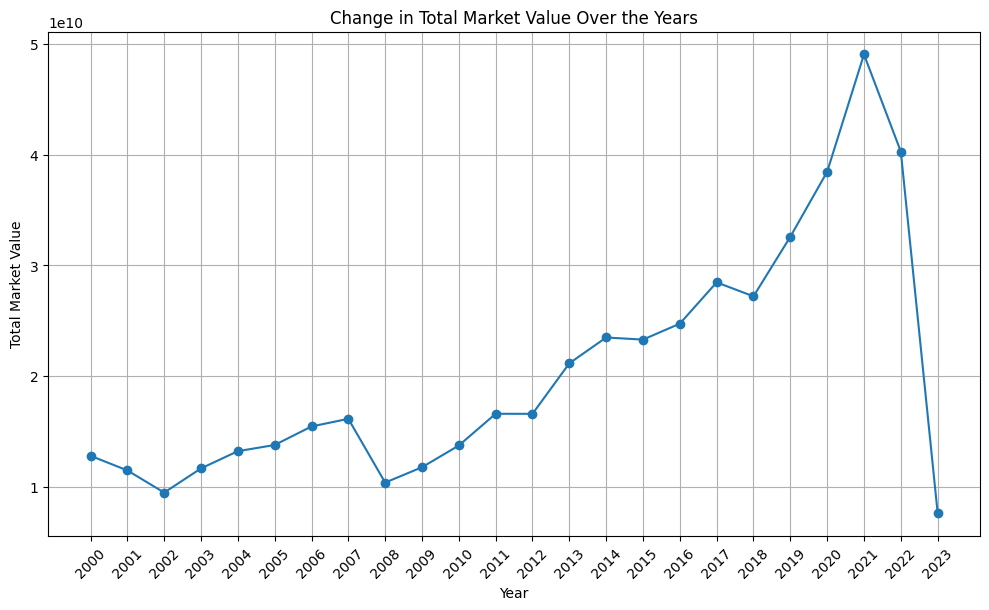

In [ ]:
# Agrupar por año u calcular el market value
market_value_by_year = fmarket.groupby('year')['mvalue'].sum().reset_index()

# Graficar para ver como cambia el market value a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(market_value_by_year['year'], market_value_by_year['mvalue'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Market Value')
plt.title('Change in Total Market Value Over the Years')
plt.grid(True)
plt.tight_layout()
plt.xticks(market_value_by_year['year'], rotation=45)
plt.show()

- How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [ ]:
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,380,672,838.05","344,723,426.83"
2001,"11,494,392,671.37","7,493,006,671.41","67,530,325.20"
2002,"9,494,723,157.61","7,320,441,084.79","-57,773,458.77"
2003,"11,675,951,523.21","7,924,776,768.22","364,552,095.88"
2004,"13,230,878,635.88","8,816,237,201.06","431,717,996.76"
2005,"13,789,108,526.52","9,645,438,810.16","522,880,104.83"
2006,"15,461,254,772.55","10,540,362,264.44","657,926,147.83"
2007,"16,149,130,338.06","11,256,645,716.63","610,497,891.61"
2008,"10,395,016,561.41","11,607,977,855.77","342,187,423.38"


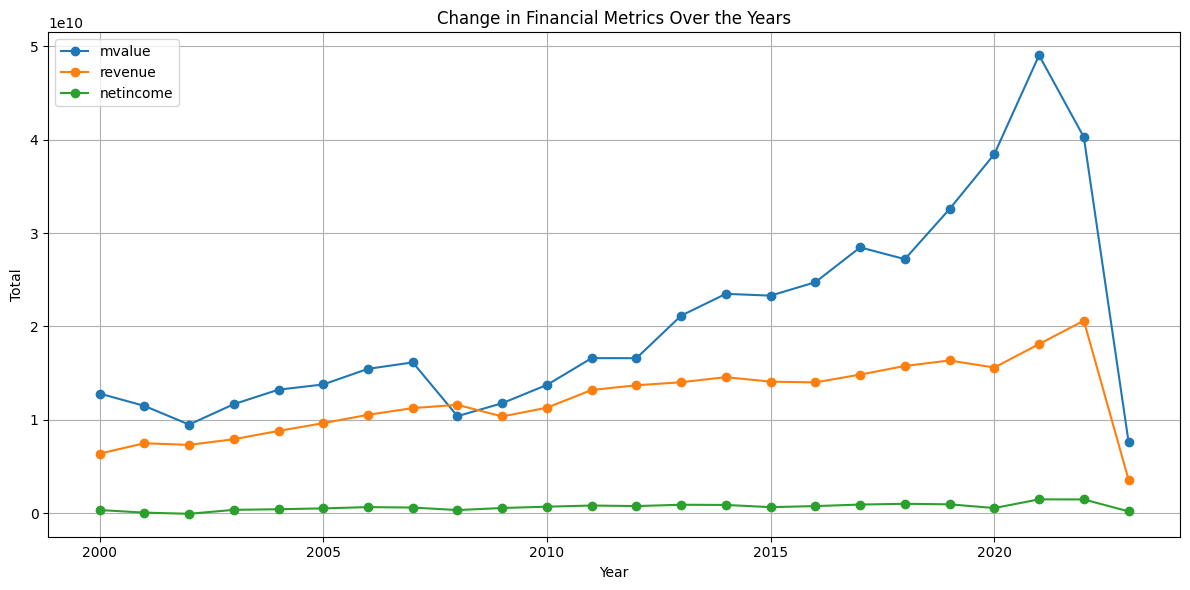

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fmarket.index, fmarket['mvalue'], marker='o', linestyle='-', label='mvalue')
plt.plot(fmarket.index, fmarket['revenue'], marker='o', linestyle='-', label='revenue')
plt.plot(fmarket.index, fmarket['netincome'], marker='o', linestyle='-', label='netincome')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Change in Financial Metrics Over the Years')
plt.grid(True)
plt.legend()  # Add a legend to distinguish between the three lines
plt.tight_layout()
plt.show()

*PODEMOS OBSERVAR COMO HA CAMBIADO EL MARKET VALUE, EL NET INCOME Y EL REVENUE A LO LARGO DE LOS AÑOS. VEMOS QUE EL MARKET VALUE A INCREMENTADO A LO LARGO DEL TIEMPO, Y PODEMOS VISUALIZAR QUE EN EL 2008 HUBO UN BAJON POR EL FAMOSO MARKET CRASH. EL NETINCOME PODEMOS OBSERVAR COMO SE HA MANTENIDO RELATIVAMENTE ESTABLE. TAMBIEN NOS PODEMOS DAR CUENTA QUE COMO EL AÑO 2023 NO HA TERMINADO, ESTE SE MUESTRA EN LAS GRAFICAS COMO UN GRAN BAJON. PERO ESTO LO PODEMOS TOMAR COMO DATOS INCOMPLETOS YA QUE EL AÑO NO HA TERMINADO*

### 6. Learning about one Industry

Selecciono mi industria

- *Service Industries*


In [ ]:
original_data = data
data = data.reset_index()
dataser = data.loc[
    (data['industria'] == 'Servicios de alojamiento temporal y de preparación de alimentos y bebidas') |
    (data['industria'] == 'Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación') |
    (data['industria'] == 'Servicios de esparcimiento cultural y deportivos, y otros servicios recreativos') |
    (data['industria'] == 'Servicios de salud y asistencia social') |
    (data['industria'] == 'Servicios educativos') |
    (data['industria'] == 'Servicios inmobiliarios y de alquiler de bienes muebles e intangibles') |
    (data['industria'] == 'Servicios profesionales, científicos y técnicos') |
    (data['industria'] == 'Transportes, correos y almacenamiento')
]
dataser['industria'].head(10)

190    Servicios profesionales, científicos y técnicos
191    Servicios profesionales, científicos y técnicos
192    Servicios profesionales, científicos y técnicos
193    Servicios profesionales, científicos y técnicos
194    Servicios profesionales, científicos y técnicos
195    Servicios profesionales, científicos y técnicos
196    Servicios profesionales, científicos y técnicos
197    Servicios profesionales, científicos y técnicos
198    Servicios profesionales, científicos y técnicos
199    Servicios profesionales, científicos y técnicos
Name: industria, dtype: object

#Entregable Proyecto 2

### For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:

In [ ]:
# Using annual fiscal information, and the most recent complete year, and industrias que esten activas
dataser2022 = dataser.loc[(dataser['year']==2022) & (dataser['fiscalmonth']==12) & (dataser['status']=='activo')]
dataser2022.head()

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
566,AAL,2022Q4,2022q4,12.00,"48,971,000.00",0.00,"47,364,000.00","325,000.00",0.00,"1,746,000.00",...,NaN,"1,607,000.00",0.03,"127,000.00",0.00,0.76,0.71,0.50,"8,266,739.28","-5,799,000.00"
2558,ABM,2022Q4,2022q4,12.00,"7,806,600.00","6,757,500.00","700,300.00",0.00,"2,300.00","41,100.00",...,NaN,"348,800.00",0.04,"230,400.00",0.03,1.60,1.15,0.24,"2,913,982.38","1,717,300.00"
2748,ABNB,2022Q4,2022q4,12.00,"8,399,000.00","1,499,000.00","5,098,000.00","25,000.00",0.00,"-162,000.00",...,NaN,"1,802,000.00",0.21,"1,893,000.00",0.23,0.52,1.86,0.14,"54,136,649.15","5,560,000.00"
3033,ABSI,2022Q4,2022q4,12.00,"5,747.00",0.00,"112,497.00","2,357.00",0.00,972.00,...,NaN,"-106,750.00",-18.57,"-104,904.00",-18.25,0.02,6.17,0.05,"194,029.31","274,414.00"
4075,ACCD,2022Q1,2022q1,12.00,"310,021.00","169,019.00","266,727.00",-133.00,0.00,"2,905.00",...,0.61,"-125,725.00",-0.41,"-123,124.00",-0.40,0.24,3.66,0.24,"1,175,789.15","855,794.00"


In [ ]:
dataser2022.columns

Index(['firm', 'qdate', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae',
       'otherincome', 'extraordinaryitems', 'finexp', 'incometax',
       'totalassets', 'currentassets', 'inventory', 'totalliabilities',
       'currentliabilities', 'longdebt', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fixedassets', 'year', 'Empresa', 'status',
       'industria', 'rq', 'ry', 'f1rq', 'f4rq', 'ebit', 'opm', 'netincome',
       'pm', 'ato', 'acidratio', 'finlev', 'mvalue', 'bookvalue'],
      dtype='object')

In [ ]:
missing_values = dataser2022.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                    0
qdate                   0
q                       0
fiscalmonth             0
revenue                 0
cogs                    0
sgae                    5
otherincome             0
extraordinaryitems      5
finexp                  0
incometax               0
totalassets             0
currentassets           0
inventory              27
totalliabilities        0
currentliabilities     27
longdebt               22
adjprice                4
originalprice           4
sharesoutstanding       1
fixedassets             0
year                    0
Empresa                 0
status                  0
industria               0
rq                      6
ry                     13
f1rq                    4
f4rq                  398
ebit                    5
opm                     7
netincome               5
pm                      7
ato                     0
acidratio              28
finlev                 22
mvalue                  4
bookval

In [ ]:
dataser2022 = dataser2022.fillna(0)

For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios. To calculate the weighted average of a ratio, you have to divide the sum of the numerator variable by the sum of the denominator variable. For example, to calculate the weighted average of profit margin you first sum all the net income of all firms and then divide it by the sum of revenue of all firms.

Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.

In [ ]:
ratio_columns = ['pm', 'ato', 'acidratio', 'finlev']

ratios = []
weighted_avgs = []
arithmetic_means = []
medians = []


# Calculate the sum of net income and revenue across all firms
sum_net_income = dataser2022['netincome'].sum()
sum_revenue = dataser2022['revenue'].sum()
# Calculate the weighted average profit margin
weighted_avg_pm = sum_net_income / sum_revenue
weighted_avgs.append(weighted_avg_pm)

# Calculate the sum of revenue and total assets across all firms
sum_total_assets = dataser2022['totalassets'].sum()
# Calculate the weighted average asset turnover
weighted_avg_ato = sum_revenue / sum_total_assets
weighted_avgs.append(weighted_avg_ato)

# Calculate the sum of current assets and current liabilities across all firms
sum_current_assets = dataser2022['currentassets'].sum()
sum_current_liabilities = dataser2022['currentliabilities'].sum()
# Calculate the weighted average acid test ratio
weighted_avg_acidratio = sum_current_assets / sum_current_liabilities
weighted_avgs.append(weighted_avg_acidratio)


# Calculate the sum of long-term debt and total assets across all firms
sum_long_debt = dataser2022['longdebt'].sum()
sum_total_assets = dataser2022['totalassets'].sum()
# Calculate the weighted average financial leverage ratio
weighted_avg_finlev = sum_long_debt / sum_total_assets
weighted_avgs.append(weighted_avg_finlev)



for ratio in ratio_columns:
  arithmetic_mean = np.mean(dataser2022[ratio])
  median = np.median(dataser2022[ratio])

  ratios.append(ratio)
  arithmetic_means.append(arithmetic_mean)
  medians.append(median)

result_df = pd.DataFrame({
    'Ratio': ratios,
    'Weighted Average': weighted_avgs,
    'Arithmetic Mean': arithmetic_means,
    'Median': medians
})

# Print the DataFrame
print(result_df)


       Ratio  Weighted Average  Arithmetic Mean  Median
0         pm              0.08            -2.49    0.04
1        ato              0.63             0.92    0.63
2  acidratio              1.29             2.83    1.42
3     finlev              0.34             0.31    0.27


***Tras hacer estos diferentes calculos, comparamos el wighted average, la media aritmetica y la mediana para los ratios. COn esto podemos ver diferentes perspectivas de la industria de Servicios. El profit margin (pm) tiene un weighted average de 0.08, lo que nos indica que, en promedio, las empresas en la insustria de Servicios retienen aproximadamente el 8% de sus ingresos como ganancia. Esta ponderación toma en cuenta el tamaño de cada empresa. Sin embargo, la media aritmetica es de -2.49, de esto podemos pensar que hay algo mal con los datos, o puede ser causado por algunos outliers. Y finalmente la mediana de 0.04 nos indica que el 50% de las empresas tienen un margen de beneficio por encima de 0.04. Esta ponderacion puede llegar a ser mejor que la media aritmetica porque no se mira influenciada por posibles outliers.***

***Si nos ponemos a interpretar y comparar el pm con el ato, podemos concluir que el weighted average de 0.08 del pm nos indica un nivel moderado de rentabilidad, mientras que el weighted average del ato, que es de 0.63, nos indica una utilizacion relativamente eficiente de los activos en la industria de Servicios.Y como vimos en la media aritmetica de pm, existen algunos outliers que podrian estar afectando. Por lo que es importante atenderlos.***

## 1.2 Multiple Regression - advanced topics

### 1.2.1 Calculation of Variables

For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:

In [ ]:
data = dataser.loc[(dataser['fiscalmonth']==12) & (dataser['status']=='activo')]
data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,NaN,"1,381,000.00",0.07,"813,000.00",0.04,0.75,0.74,0.21,NaN,"7,176,000.00"
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,NaN,"-2,470,000.00",-0.13,"-1,762,000.00",-0.09,0.58,0.87,0.30,NaN,"5,373,000.00"
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,NaN,"-3,330,000.00",-0.19,"-3,511,000.00",-0.20,0.57,0.68,0.41,NaN,"957,000.00"
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,NaN,"-844,000.00",-0.05,"-1,228,000.00",-0.07,0.59,0.71,0.45,NaN,"46,000.00"
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,NaN,"-144,000.00",-0.01,"-761,000.00",-0.04,0.65,0.71,0.47,NaN,"-581,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,-0.48,"-34,624.00",-0.18,"-33,646.00",-0.18,0.42,2.12,0.00,"4,884,348.32","240,236.00"
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,0.25,"-35,313.00",-0.12,"-28,655.00",-0.09,0.50,1.89,0.00,"6,023,519.80","308,558.00"
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,0.19,"-113,956.00",-0.26,"-115,116.00",-0.27,0.24,3.73,0.49,"18,698,591.43","484,829.00"
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,0.09,"-207,812.00",-0.31,"-262,029.00",-0.39,0.30,2.57,0.42,"36,379,348.94","528,895.00"


In [ ]:
missing_values = data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                    0
qdate                   0
q                       0
fiscalmonth             0
revenue                 1
cogs                    1
sgae                   35
otherincome             1
extraordinaryitems     35
finexp                  1
incometax               1
totalassets             0
currentassets           8
inventory             279
totalliabilities        0
currentliabilities    279
longdebt              249
adjprice              226
originalprice         226
sharesoutstanding      82
fixedassets             1
year                    0
Empresa                 0
status                  0
industria               0
rq                    295
ry                    677
f1rq                  228
f4rq                  609
ebit                   35
opm                    63
netincome              35
pm                     63
ato                     1
acidratio             282
finlev                249
mvalue                277
bookval

In [ ]:
data = data.fillna(0)
missing_values = data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
dtype: int64


In [ ]:
original_data = data
original_data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,0.00,"1,381,000.00",0.07,"813,000.00",0.04,0.75,0.74,0.21,0.00,"7,176,000.00"
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,0.00,"-2,470,000.00",-0.13,"-1,762,000.00",-0.09,0.58,0.87,0.30,0.00,"5,373,000.00"
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,0.00,"-3,330,000.00",-0.19,"-3,511,000.00",-0.20,0.57,0.68,0.41,0.00,"957,000.00"
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,0.00,"-844,000.00",-0.05,"-1,228,000.00",-0.07,0.59,0.71,0.45,0.00,"46,000.00"
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,0.00,"-144,000.00",-0.01,"-761,000.00",-0.04,0.65,0.71,0.47,0.00,"-581,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,-0.48,"-34,624.00",-0.18,"-33,646.00",-0.18,0.42,2.12,0.00,"4,884,348.32","240,236.00"
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,0.25,"-35,313.00",-0.12,"-28,655.00",-0.09,0.50,1.89,0.00,"6,023,519.80","308,558.00"
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,0.19,"-113,956.00",-0.26,"-115,116.00",-0.27,0.24,3.73,0.49,"18,698,591.43","484,829.00"
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,0.09,"-207,812.00",-0.31,"-262,029.00",-0.39,0.30,2.57,0.42,"36,379,348.94","528,895.00"


- Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.

- Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

In [ ]:
# Identificar valores faltantes (nan)
missing_values = original_data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
dtype: int64


In [ ]:
original_data.dropna(subset=["mvalue"], how="all", inplace=True)
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

original_data["pct"] = original_data.groupby('q')['mvalue'].apply(dense_inclusive_pct).astype(int)

original_data["isSmall"] = original_data.pct <= 33
original_data["isSmall"] = original_data["isSmall"].astype(int)

original_data["isMedium"] = (original_data.pct <= 66) & (original_data.pct > 33)
original_data["isMedium"] = original_data["isMedium"].astype(int)

<ipython-input-103-93f2ee1e09a5>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  original_data["pct"] = original_data.groupby('q')['mvalue'].apply(dense_inclusive_pct).astype(int)


In [ ]:
original_data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue,pct,isSmall,isMedium
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,"813,000.00",0.04,0.75,0.74,0.21,0.00,"7,176,000.00",0,1,0
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,"-1,762,000.00",-0.09,0.58,0.87,0.30,0.00,"5,373,000.00",0,1,0
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,"-3,511,000.00",-0.20,0.57,0.68,0.41,0.00,"957,000.00",0,1,0
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,"-1,228,000.00",-0.07,0.59,0.71,0.45,0.00,"46,000.00",0,1,0
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,"-761,000.00",-0.04,0.65,0.71,0.47,0.00,"-581,000.00",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,"-33,646.00",-0.18,0.42,2.12,0.00,"4,884,348.32","240,236.00",78,0,0
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,"-28,655.00",-0.09,0.50,1.89,0.00,"6,023,519.80","308,558.00",82,0,0
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,"-115,116.00",-0.27,0.24,3.73,0.49,"18,698,591.43","484,829.00",94,0,0
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,"-262,029.00",-0.39,0.30,2.57,0.42,"36,379,348.94","528,895.00",94,0,0


In [ ]:
original_data.columns

Index(['firm', 'qdate', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae',
       'otherincome', 'extraordinaryitems', 'finexp', 'incometax',
       'totalassets', 'currentassets', 'inventory', 'totalliabilities',
       'currentliabilities', 'longdebt', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fixedassets', 'year', 'Empresa', 'status',
       'industria', 'rq', 'ry', 'f1rq', 'f4rq', 'ebit', 'opm', 'netincome',
       'pm', 'ato', 'acidratio', 'finlev', 'mvalue', 'bookvalue', 'pct',
       'isSmall', 'isMedium'],
      dtype='object')

- Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

- Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

- Calculate book-to-market ratio: bmr = bookvalue / marketvalue



In [ ]:
# Calculate operating earnings per share deflated by stock price (oepsp)
original_data['oepsp'] = (original_data['ebit'] / original_data['sharesoutstanding']) / original_data['originalprice']

# Calculate earnings per share deflated by stock price (epsp)
original_data['epsp'] = (original_data['netincome'] / original_data['sharesoutstanding']) / original_data['originalprice']

# Calculate the book-to-market ratio (bmr)
original_data['bmr'] = original_data['bookvalue'] / original_data['mvalue']

In this model, the variable you have to use as dependent variable will be annual stock returns (instead of quarterly returns) one quarter in the future (f1.ry).

In [ ]:
# Identificar valores faltantes (nan)
missing_values = original_data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
pct                   0
isSmall               0
isMedium 

In [ ]:
original_data = original_data.fillna(0)

In [ ]:
# Identificar valores faltantes (nan)
missing_values = original_data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
pct                   0
isSmall               0
isMedium 

## 1.2.2 Winsorization of variables

Winzorization is a common technique to treat very extreme values of variables. Although winsorization has the risk of losing important information for regression analysis, it is also useful to avoid non reliable estimates of regression coefficients and standard error.

Winsorization is usually performed to ratios and percentages. For variables that measure any other feature of the subjects, the normal procedure for avoiding very extreme values is the logarithmic transformation.

You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.

In [ ]:
# Define the ratios for winsorization
ratios_to_winsorize = ['pm', 'ato', 'epsp', 'oepsp', 'bmr']

# Calculate summary statistics
summary_stats = original_data[ratios_to_winsorize].describe()
summary_stats

,pm,ato,epsp,oepsp,bmr
count,"5,657.00","5,657.00","5,657.00","5,657.00","5,657.00"
mean,-1.52,0.97,NaN,NaN,NaN
std,45.25,1.06,NaN,NaN,NaN
min,"-2,709.61",0.00,-inf,-inf,-inf
25%,-0.01,0.42,-0.01,0.01,0.17
50%,0.05,0.72,0.03,0.06,0.37
75%,0.10,1.28,0.06,0.10,0.69
max,19.85,32.36,inf,inf,inf


In [ ]:
# Define the ratios for winsorization
ratios_to_winsorize = ['pm', 'ato', 'epsp', 'oepsp', 'bmr']

# Define the quantile thresholds (keep at least 98% of data, in this case we keep 90%)
lower_quantile = 0.05  # 1% quantile
upper_quantile = 0.95  # 99% quantile

# Create a new DataFrame for winsorized data
winsorized_data = original_data.copy()

# Apply winsorization for each ratio
for ratio in ratios_to_winsorize:
    lower_threshold = winsorized_data[ratio].quantile(lower_quantile)
    upper_threshold = winsorized_data[ratio].quantile(upper_quantile)

    # Apply winsorization to the ratio column
    winsorized_data[ratio] = np.where(winsorized_data[ratio] < lower_threshold, lower_threshold, winsorized_data[ratio])
    winsorized_data[ratio] = np.where(winsorized_data[ratio] > upper_threshold, upper_threshold, winsorized_data[ratio])

winsorized_data[['pm', 'ato', 'epsp', 'oepsp', 'bmr']].describe()

,pm,ato,epsp,oepsp,bmr
count,"5,657.00","5,657.00","5,657.00","5,657.00","5,657.00"
mean,0.02,0.91,-0.01,0.04,0.56
std,0.17,0.66,0.16,0.14,0.65
min,-0.47,0.11,-0.57,-0.37,-0.08
25%,-0.01,0.42,-0.01,0.01,0.17
50%,0.05,0.72,0.03,0.06,0.37
75%,0.10,1.28,0.06,0.10,0.69
max,0.29,2.55,0.17,0.29,2.76


***Como se observó antes de realizar la winsorization, habían valores extremos como por ejemplo los inf. Para esto aplicamos la winzorization y así reemplazamos estos valores con algunos valores que esten dentro del corte que definimos. En este caso definimos el percentil 5 y 95. Al haber aplicado esta técnica nuestros valores atípicos se ajustan a valores menos extremos y hace que el análisis posteriormente sea más robusto y menos sensible a valores atípicos.***

## 1.2.3 Multicollienarity

Do the multicollienarity test considering all numeric independent variables:

profit margin, asset turn over, epsp, oepsp, bmr

Interpret the test. If there is a multicollienarity problem, propose how to solve it.

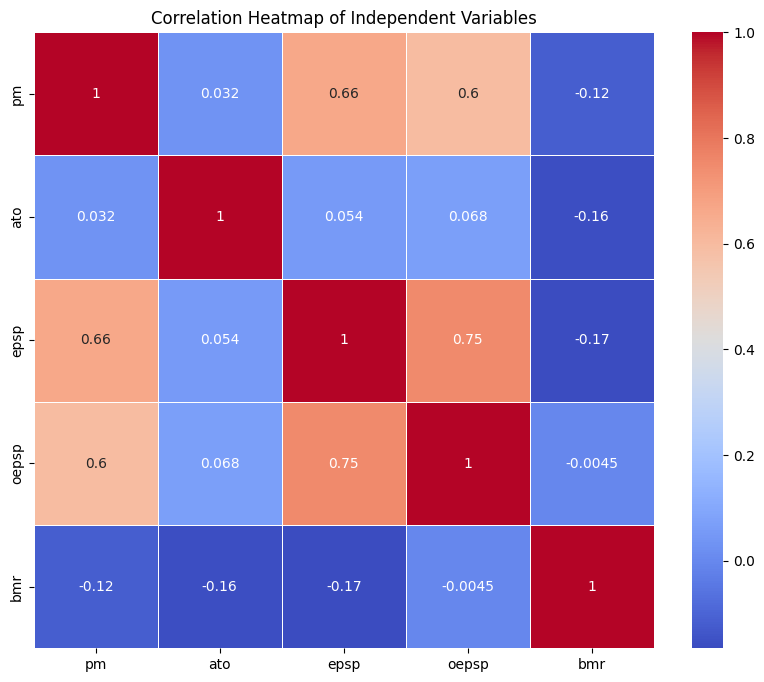

In [ ]:
# Define the independent variables (numeric variables you want to check for multicollinearity)
numeric_independent_vars = ['pm', 'ato', 'epsp', 'oepsp', 'bmr']

# Calculate the correlation matrix
correlation_matrix = winsorized_data[numeric_independent_vars].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()

In [ ]:
winsorized_data[numeric_independent_vars].corr()

,pm,ato,epsp,oepsp,bmr
pm,1.00,0.03,0.66,0.60,-0.12
ato,0.03,1.00,0.05,0.07,-0.16
epsp,0.66,0.05,1.00,0.75,-0.17
oepsp,0.60,0.07,0.75,1.00,-0.00
bmr,-0.12,-0.16,-0.17,-0.00,1.00


***Para analizar la multicolinealidad se hizo una matriz de correlacion para evaluar si existen correlaciones fuertes entre las variables independientes. Podemos observar como Profit Margin tiene una correlación positiva y moderada del 0.60 con las ganancias por acción operativas (oepsp). De la misma manera el pm y el epsp tambien tienen una correlacion de 0.66. Las relaciones de las demás variables independientes se mantienen negativas y muy debiles llegando a valores cercanos al 0.***

***Como la mayoría de las correlaciones de las variables no son altas, podemos decir que la multicolinealidad no es un problema en este caso. Sin embargo, la correlación que hay entre PM y OEPSP, y la de OEPSP con EPSP son relativamente fuerte en comparación con otras correlaciones podría indicar multicolinealidad entre estas dos variables.***

##1.2.4 Multiple regression model
Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later). For the ratios, use the winsorized version (if the ratio has extreme values)

In [ ]:
winsorized_data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,acidratio,finlev,mvalue,bookvalue,pct,isSmall,isMedium,oepsp,epsp,bmr
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,0.74,0.21,0.00,"7,176,000.00",0,1,0,0.29,0.17,2.76
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,0.87,0.30,0.00,"5,373,000.00",0,1,0,-0.37,-0.57,2.76
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,0.68,0.41,0.00,"957,000.00",0,1,0,-0.37,-0.57,2.76
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,0.71,0.45,0.00,"46,000.00",0,1,0,-0.37,-0.57,2.76
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,0.71,0.47,0.00,"-581,000.00",0,1,0,-0.37,-0.57,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,2.12,0.00,"4,884,348.32","240,236.00",78,0,0,-0.01,-0.01,0.05
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,1.89,0.00,"6,023,519.80","308,558.00",82,0,0,-0.01,-0.00,0.05
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,3.73,0.49,"18,698,591.43","484,829.00",94,0,0,-0.01,-0.01,0.03
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,2.57,0.42,"36,379,348.94","528,895.00",94,0,0,-0.01,-0.01,0.01


In [ ]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = winsorized_data['f4rq']
X = winsorized_data[numeric_independent_vars + ['isSmall', 'isMedium']]

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

In [ ]:
# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Get the model summary
summary = model.summary()

# Print the model summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.626
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.92e-12
Time:                        17:38:52   Log-Likelihood:                 377.74
No. Observations:                5657   AIC:                            -739.5
Df Residuals:                    5649   BIC:                            -686.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.007      2.672      0.0

Interpret your model

- Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.

- Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.

- Interpret the R-squared of the model

***Tras hacer nuestro modelo podemos observar los siguientes coeficientes para cada variable:***

***Profit Margin: El coeficiente de 0.0583 nos indica que un aumento de una unidad en el margen de beneficio se asocia con un aumento de 0.0583 unidades en las futuras tasas de retorno de las acciones de la empresa. Al sacar el valor p, nos podemos dar cuenta que esta relación es estadísticamente significativa ya que su valor p es de 0.021. Podemos concluir que las empresas con márgenes de beneficio más altos tiened a tener tasas de retorno de acciones ligeramente más altas. ***

***Asset Turnover (ato): Con su valor p de 0.697 podemos decir que su relación no es estadísticamente significativa. Es decir, los cambios en el Asset Turnover tienen un impacto mínimo en las tasas de retorno de las acciones en el modelo.**

***Earnings Per Share (epsp): Su coeficiente de 0.0529 nos indica que un aumento de una unidad en las ganancias por acción se asocia con una disminución de 0.0529 unidades en las tasas de retorno de las acciones. Sin embargo, esta relacion no es estadísticamente significativa por su valor de p ya que es de 0.100***

***Operating Earnings Per Share (oepsp): Su coeficiente de 0.1691 nos indica que un aumento de una unidad en las ganancias por acción operativas se asocia con un aumento de 0.1691 unidadees en las tasas de retorno de las acciones. También por su valor p de 0.000 podemos decir que si es significativa la relación.***

***Book to Market Ratio (bmr): Su coeficiente de '0.0041 y su valor p de 0.432 nos indica que la relación no es estadísticamente significativa. Los cambios en el bmr tienen un impacto mínimo en las tasas de retorno de las acciones en el modelo.***

***Tamaño de Empresa: Sus valores p son altos, siendo de 0.667 y 0.814 lo que nos indica que estos valores no tienen un impacto estadísticamente significativo en las tasas de retorno de las acciones.***

***Agregamos los términos de interacción para examinar cómo el efecto de una variable independiente en una variable dependiente puede variar en función de otra variable independiente.***

In [ ]:
# Define the dependent variable (y) and independent variables (X)
y = winsorized_data['f4rq']
X = winsorized_data[numeric_independent_vars + ['isSmall', 'isMedium']]

# interaction termsn
X['isSmall * epsp'] = winsorized_data['isSmall'] * winsorized_data['epsp']
X['isMedium * epsp'] = winsorized_data['isMedium'] * winsorized_data['epsp']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.549
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           4.54e-11
Time:                        17:38:52   Log-Likelihood:                 378.03
No. Observations:                5657   AIC:                            -736.1
Df Residuals:                    5647   BIC:                            -669.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0181      0.007     

<ipython-input-117-13c297d8f375>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isSmall * epsp'] = winsorized_data['isSmall'] * winsorized_data['epsp']
<ipython-input-117-13c297d8f375>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isMedium * epsp'] = winsorized_data['isMedium'] * winsorized_data['epsp']


***Los términos de interacción los podemos interpretar de la siguiente manera:***

***Si el coeficiente es positivo
y estadísticamente significtivo, significa que la relación entre las ganancias por acción y las tasas de retorno es más fuerte o positiva para empresas pequeñas o medianas en comparación con empresas grandes.***

***Si el coeficiente es negativo y estadísticamente significativo, signifia que la relación es más debil o negativa para empresas pequeñas o medianas en comparación con empresas grandes.***

***Y finalmente, si el coeficiente no es estadísticamente significativo, no se puede concluir si hay una diferecia entre la relación entre las empresas de diferentes tamños.***

***Tras observar los valores p de ambas relaciones de empresas pequeñas y empras medianas, podemos concluir que ninguan tiene un efecto significativo en las tasas de retorno de las acciones.***

***Al analizar el valor de R-cuadrado de 0.012 nos indica que las vairbales incluidas en el modelo explican solo una muy pequeña porción (1.2%) de la variabilidad en las tasas de retorno de las acciones. Podemos decir que oepsp tiene un efecto signifiativo en las tasas de retorno de las acciones, mientras que otras variable y términos de interacción no tienen un impacto significativo. ***

Run a multiple regression but now using only the last complete year of data (yearf=2022)

- What differences do you see compared with the previous model? Explain

In [ ]:
data_2022 = winsorized_data.loc[(winsorized_data['year']==2022) & (winsorized_data['fiscalmonth']==12) & (winsorized_data['status']=='activo')]
data_2022

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,acidratio,finlev,mvalue,bookvalue,pct,isSmall,isMedium,oepsp,epsp,bmr
566,AAL,2022Q4,2022q4,12.00,"48,971,000.00",0.00,"47,364,000.00","325,000.00",0.00,"1,746,000.00",...,0.71,0.50,"8,266,739.28","-5,799,000.00",80,0,0,0.19,0.02,-0.08
2558,ABM,2022Q4,2022q4,12.00,"7,806,600.00","6,757,500.00","700,300.00",0.00,"2,300.00","41,100.00",...,1.15,0.24,"2,913,982.38","1,717,300.00",65,0,1,0.12,0.08,0.59
2748,ABNB,2022Q4,2022q4,12.00,"8,399,000.00","1,499,000.00","5,098,000.00","25,000.00",0.00,"-162,000.00",...,1.86,0.14,"54,136,649.15","5,560,000.00",96,0,0,0.03,0.03,0.10
3033,ABSI,2022Q4,2022q4,12.00,"5,747.00",0.00,"112,497.00","2,357.00",0.00,972.00,...,6.17,0.05,"194,029.31","274,414.00",18,1,0,-0.37,-0.54,1.41
4075,ACCD,2022Q1,2022q1,12.00,"310,021.00","169,019.00","266,727.00",-133.00,0.00,"2,905.00",...,3.66,0.24,"1,175,789.15","855,794.00",38,0,1,-0.11,-0.10,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529474,YUMC,2022Q4,2022q4,12.00,"9,569,000.00","8,142,000.00","798,000.00","-26,000.00","-38,000.00","-84,000.00",...,1.82,0.16,"22,867,054.40","7,148,000.00",90,0,0,0.03,0.02,0.31
529759,Z,2022Q4,2022q4,12.00,"1,958,000.00","367,000.00","1,684,000.00","43,000.00","-13,000.00","35,000.00",...,13.34,0.27,"7,657,172.11","4,482,000.00",80,0,0,-0.01,-0.01,0.59
531184,ZIP,2022Q4,2022q4,12.00,"904,649.00","86,298.00","721,123.00","5,354.00",0.00,"28,498.00",...,4.88,0.78,"1,809,248.21","28,620.00",54,0,1,0.05,0.03,0.02
531561,ZM,2022Q1,2022q1,12.00,"4,099,864.00","1,054,554.00","1,981,719.00","43,761.00",0.00,"5,720.00",...,3.91,0.01,"35,066,302.18","5,780,018.00",100,0,0,0.03,0.04,0.16


In [ ]:
y = data_2022['f4rq']
X = data_2022[numeric_independent_vars + ['isSmall', 'isMedium']]

# Add interaction terms between size and epsp
X['isSmall * epsp'] = data_2022['isSmall'] * data_2022['epsp']
X['isMedium * epsp'] = data_2022['isMedium'] * data_2022['epsp']

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model with interaction terms
model_2022 = sm.OLS(y, X).fit()

# Get the model summary
summary_2022 = model_2022.summary()

# Print the model summary
print(summary_2022)

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.479
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.153
Time:                        17:38:52   Log-Likelihood:                 566.74
No. Observations:                 474   AIC:                            -1113.
Df Residuals:                     464   BIC:                            -1072.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0119      0.008     

<ipython-input-119-47b174e4fbd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isSmall * epsp'] = data_2022['isSmall'] * data_2022['epsp']
<ipython-input-119-47b174e4fbd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['isMedium * epsp'] = data_2022['isMedium'] * data_2022['epsp']


***En este modelo podemos obsevar como hay algunas diferencias. Esto se puede deber a que como el dataset ahora solo toma en cuenta el año anterior, entonces esto puede afectar la precision del modelo. Las principales diferencias son las siguientes:***

***El valor del R-cuadrado incrementa de 0.012 a 0.028. Lo que significa que el modelo del año reciente explica un poco más la variabilidad en las tasas de retorno de las acciones en comparación con el otro modelo. Sin embargo, este sigue siendo bajo.***

***También algunos coeficientes han cambiado. Por ejemplo el PM paso de tener un coeficiente positivo a tener un coeficiente negativo.***

***Los términos de interacción tienen coeficientes positivos ahora en el nuevo modelo. Sin embargo, siguen sienfo no significativos.***

##1.2.5 Regression Diagnosis
Do a diagnosis for possible outliers and influential observations, but using only annual data for 2022. You will end up with a cross-sectional sample with the most recent financial information.

Learn about regression diagnosis [HERE](https://rpubs.com/cdorante/tc3006c_p2) before you work on this section.

Using this cross-sectional dataset with only annual data for 2022, you have to do the following:

In [ ]:
data_2022

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,acidratio,finlev,mvalue,bookvalue,pct,isSmall,isMedium,oepsp,epsp,bmr
566,AAL,2022Q4,2022q4,12.00,"48,971,000.00",0.00,"47,364,000.00","325,000.00",0.00,"1,746,000.00",...,0.71,0.50,"8,266,739.28","-5,799,000.00",80,0,0,0.19,0.02,-0.08
2558,ABM,2022Q4,2022q4,12.00,"7,806,600.00","6,757,500.00","700,300.00",0.00,"2,300.00","41,100.00",...,1.15,0.24,"2,913,982.38","1,717,300.00",65,0,1,0.12,0.08,0.59
2748,ABNB,2022Q4,2022q4,12.00,"8,399,000.00","1,499,000.00","5,098,000.00","25,000.00",0.00,"-162,000.00",...,1.86,0.14,"54,136,649.15","5,560,000.00",96,0,0,0.03,0.03,0.10
3033,ABSI,2022Q4,2022q4,12.00,"5,747.00",0.00,"112,497.00","2,357.00",0.00,972.00,...,6.17,0.05,"194,029.31","274,414.00",18,1,0,-0.37,-0.54,1.41
4075,ACCD,2022Q1,2022q1,12.00,"310,021.00","169,019.00","266,727.00",-133.00,0.00,"2,905.00",...,3.66,0.24,"1,175,789.15","855,794.00",38,0,1,-0.11,-0.10,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529474,YUMC,2022Q4,2022q4,12.00,"9,569,000.00","8,142,000.00","798,000.00","-26,000.00","-38,000.00","-84,000.00",...,1.82,0.16,"22,867,054.40","7,148,000.00",90,0,0,0.03,0.02,0.31
529759,Z,2022Q4,2022q4,12.00,"1,958,000.00","367,000.00","1,684,000.00","43,000.00","-13,000.00","35,000.00",...,13.34,0.27,"7,657,172.11","4,482,000.00",80,0,0,-0.01,-0.01,0.59
531184,ZIP,2022Q4,2022q4,12.00,"904,649.00","86,298.00","721,123.00","5,354.00",0.00,"28,498.00",...,4.88,0.78,"1,809,248.21","28,620.00",54,0,1,0.05,0.03,0.02
531561,ZM,2022Q1,2022q1,12.00,"4,099,864.00","1,054,554.00","1,981,719.00","43,761.00",0.00,"5,720.00",...,3.91,0.01,"35,066,302.18","5,780,018.00",100,0,0,0.03,0.04,0.16


- Using matrix algebra calculate the beta coefficients of the same regression model

In [ ]:
# coeficientes beta
y = data_2022['f4rq']  # Variable dependiente
X = data_2022[['pm', 'ato', 'epsp', 'oepsp', 'bmr', 'isSmall', 'isMedium']]  # Variables independientes

X = sm.add_constant(X)  # Agregar constante (intercepto) al modelo

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   f4rq   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.800
Date:                Sun, 15 Oct 2023   Prob (F-statistic):             0.0854
Time:                        17:38:52   Log-Likelihood:                 566.35
No. Observations:                 474   AIC:                            -1117.
Df Residuals:                     466   BIC:                            -1083.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.008      1.453      0.147      -0.004       0.027
pm            -0.0582      0.027     -2.183      0.030      -0.111      -0.006
ato           -0.0073      0.006     -1.279      0.202      -0.018       0.004
epsp           0.0646      0.038      1.680      0.094      -0.011       0.140
oepsp          0.0204      0.044      0.467      0.641      -0.066       0.106
bmr           -0.0004      0.006     -0.059      0.953      -0.012       0.012
isSmall       -0.0063      0.010     -0.647      0.518      -0.025       0.013
isMedium      -0.0104      0.009     -1.199      0.231      -0.028       0.007
==============================================================================
Omnibus:                      238.830   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18985.830
Skew:                          -1.261   Prob(JB):                         0.00
Kurtosis:                      33.902   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Using matrix algebra calculate the standard errors of the beta coefficients (optional)

In [ ]:
# errores estándar de los coeficientes beta
std_err = model.bse  # Contiene los errores estándar de los coeficientes
std_err

const      0.01
pm         0.03
ato        0.01
epsp       0.04
oepsp      0.04
bmr        0.01
isSmall    0.01
isMedium   0.01
dtype: float64

- Using matrix algebra calculate the R-squared and the adjusted R-squared of the model (optional)

In [ ]:
# R-cuadrado y R-cuadrado ajustado
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
print(f"R-cuadrado: {r_squared}")
print(f"R-cuadrado ajustado: {adjusted_r_squared}")

R-cuadrado: 0.0263201704058742
R-cuadrado ajustado: 0.01169407854501825


- Using matrix algebra calculate the Hat Matrix

In [ ]:
#  Hat Matrix
hat_matrix = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
hat_matrix

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
566,0.02,0.00,0.00,-0.00,0.00,0.01,0.01,0.00,0.01,-0.00,...,0.00,0.00,0.01,-0.00,0.01,0.01,0.01,0.00,0.00,0.01
2558,0.00,0.01,-0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,-0.00,...,0.01,0.00,0.01,-0.00,0.00,0.00,-0.00,0.01,-0.00,0.00
2748,0.00,-0.00,0.01,-0.00,-0.01,0.00,-0.00,-0.00,0.01,-0.00,...,-0.00,0.00,-0.01,-0.00,0.01,0.01,0.01,0.00,0.01,-0.00
3033,-0.00,-0.00,-0.00,0.02,0.01,-0.00,0.02,0.00,0.00,0.02,...,0.00,-0.00,-0.01,0.01,-0.00,0.00,0.00,-0.00,-0.00,0.00
4075,0.00,0.01,-0.01,0.01,0.02,0.00,0.01,0.02,0.00,0.01,...,0.01,0.00,-0.00,0.01,-0.01,0.00,0.01,0.00,-0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529474,0.01,0.00,0.01,0.00,0.00,0.01,-0.00,0.00,0.01,0.00,...,0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.01
529759,0.01,-0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.01,...,0.00,0.01,-0.00,0.00,0.00,0.01,0.01,-0.00,0.00,0.01
531184,0.00,0.01,0.00,-0.00,0.00,0.00,-0.01,0.01,-0.00,-0.01,...,0.01,0.00,0.01,0.00,0.00,0.00,-0.00,0.01,0.00,-0.00
531561,0.00,-0.00,0.01,-0.00,-0.01,0.00,-0.00,-0.00,0.01,-0.00,...,-0.00,0.00,-0.01,-0.00,0.01,0.01,0.00,0.00,0.01,-0.00


- With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.

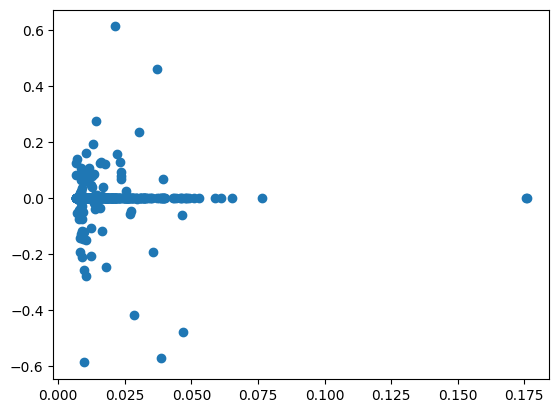

In [ ]:
# Get diagonal of hat matrix (leverage)
leverage = np.diag(hat_matrix)

# Plot the leverage values
plt.scatter(leverage, y);

In [ ]:
# get information to a pandas dataframe
leverage = pd.DataFrame(leverage)
leverage.describe()

,0
count,474.00
mean,0.02
std,0.01
min,0.01
25%,0.01
50%,0.01
75%,0.02
max,0.18


Por la gráfica nos podemos dar cuenta que si hay leverage points, y estos los podemos eliminar a partir de la siguiente regla:

2(K+1)/N

Donde K es el número de variables (X) y N el númeor de observaciones

2(7+1)/474

In [ ]:
has_to_be_less = (2*(7+1))/474
has_to_be_less

0.03375527426160337

In [ ]:
leverage_points = hat_matrix > 2 * (X.shape[1] + 1)

Podemos ver que los datos deben de ser menores a 0.03375 para no ser considerados leverage points.

- Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.

In [ ]:
studentized_residuals = model.get_influence().resid_studentized_internal
studentized_residuals

array([-1.45102418e-01,  7.02993022e-02,  3.73039555e-02,  1.55178719e-01,
        8.20869682e+00,  2.13967256e-01,  1.40241563e-01, -6.46992628e-02,
       -1.30639506e-01,  1.89546052e-01,  3.63035885e-02,  3.30668338e-02,
        5.99936131e-01,  1.81526887e-02, -7.27437762e-02,  6.41655213e-02,
       -4.30278990e-02, -1.76179511e-01,  2.21671333e-02, -9.10141232e-02,
        7.04283365e-03, -3.38946368e-02,  4.68628600e-02,  1.61556916e-01,
       -4.75680541e-02,  1.95102361e+00,  4.28399607e-01, -1.11031859e-01,
       -2.78415766e+00,  3.51595954e-02, -1.55476464e+00,  3.98018363e-02,
       -2.02377803e+00,  4.51072163e-03, -6.45341346e-02, -7.67749265e-02,
       -1.54410004e+00, -9.17034911e-03,  6.90793669e-02, -1.58977669e+00,
        8.76441321e-02, -1.07362350e-02,  3.06033883e-02,  1.23827152e-02,
       -1.24039334e-02, -3.23545846e-02,  5.55896551e-02,  2.46326421e-03,
        3.61255599e-02,  2.19430558e-01, -1.69481222e-02,  6.67196161e-02,
        1.49902904e-01,  

In [ ]:
outliers_studentized = np.abs(studentized_residuals) > 2
outliers_studentized

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

***Los residuos estandarizados se calculan dividiendo los residuos por una estimación de su error estándar. La estimación del error estándar es diferente para cada puto de datos, y tienen en cuenta el apalancamiento del punto de datos.***

***Como los residuos estandarizados toman en cuenta el apalancamiento , entonces podemos decir que son una medida más confiable de valores atípicos que los rsiduos regulares.***

- Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.

In [ ]:
# Usando la distancia de Cook
influence = model.get_influence()
cook_distances = influence.cooks_distance

# Acceder a los valores dentro de la tupla
cook_values = cook_distances[0]

# Realizar la comparación
outliers_cook = cook_values > 4 / (X.shape[0] - X.shape[1])

outliers_cook

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

***El criterio utilizado para identificar los valores atípicos con la distancia de Cook es marcar cualquier punto de datos con una distancia de Cook mayor que 4/n, donde n es el numero de puntos de datos en la muestra. ***

***Una distancia de Cook mayor a 4/n es menos probable que ocurra por casualidad, y por lo tanto es más probable que se deba a un valor atípico.***

In [ ]:
# Posibles observaciones influyentes
influential_observations = leverage_points | outliers_studentized | outliers_cook
influential_observations

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
566,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2558,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2748,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3033,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4075,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529474,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
529759,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
531184,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
531561,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- List the influential observations and decide whether to drop them or keep some of them

- Re-run the multiple regression model without the influential observation

Compare the model with the previous one. Which model was better? Explain the differences

In [ ]:
# Hacemos desde identificar las observaciones influyentes y dropearlas

# Identifica observaciones influyentes
influence = model.get_influence()
cook_distances = influence.cooks_distance[0]  # Accede a los valores de Cook's distance

# Umbral para identificar observaciones influyentes  4/n
threshold = 4 / (X.shape[0] - X.shape[1])

# Encuentra las observaciones influyentes
influential_observations = np.where(cook_distances > threshold)[0]

# Reindexa X y y antes de eliminar observaciones influyentes
new_X = X.reset_index(drop=True)  # Esto elimina el índice anterior y lo reinicia
new_y = y.reset_index(drop=True)

# Luego, elimina las observaciones influyentes
if len(influential_observations) > 0:
    new_X = new_X.drop(influential_observations)
    new_y = new_y.drop(influential_observations)

    # Vuelve a ajustar el modelo con las observaciones eliminadas
    new_model = sm.OLS(new_y, new_X).fit()

    print("Modelo ajustado sin observaciones influyentes:")
    print(new_model.summary())
else:
    print("No se encontraron observaciones influyentes.")

Modelo ajustado sin observaciones influyentes:
                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6855
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.684
Time:                        17:38:53   Log-Likelihood:                 947.24
No. Observations:                 458   AIC:                            -1878.
Df Residuals:                     450   BIC:                            -1845.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

***Podemos observar como en comparación a nuestro modelo anterior (antes de hacer drop a los valores influyentes) nuestro modelo no mejora. En general dropear estos valores puede mejorar el modelo ya que los valores influyentes pueden sesgar los resutados. Sin embargo, en algunos casos esto no es así y esto se puede deber a que los valores influyentes son genuinos. Esto lo podemos observar también al volver a ver los valores de la distancia de Cook. Todos los puntos de datos tienen una distancia de Cook baja, lo que es indicadorde qe eliminarlos es poco probable que mejore el modelo.***